# Machine Learning and Statistics Project
By Clare Tubridy
***

## Background

### Project Outline
>- The project is to create a notebook exploring classification algorithms applied on the iris flower data set associated with Ronald
>A Fisher.
>- In your notebook, you should first explain what supervised learning is and then explain what classification algorithms are.
>- Describe at least one common classification algorithm and implement it using the scikit-learn Python library.
>- Throughout your notebook, use appropriate plots, mathematical
>notation, and diagrams to explain the relevant concepts

### Irish Flower Dataset
The Iris flower data set, otherwise known as Fishers Iris data set, is a multivariate data set used and made famous by the British statistcian and biologist Ronald Fisher in his 1936 paper *"The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis"* [2]. Multivariate statistics is a branch of statistics that deals with the analysis of multiple variables at the same time [3]. It involves studying various types of multivariate analysis and their relationships with each other. This data set has since been widely used for pattern recognition and classification tasks in various fields, including machine learning, statistics, and biology. Fisher's Iris data set is a well-known and widely used data set in the field of machine learning and statistics. It is a valuable resource for researchers in this field. Its simplicity and small size make it an ideal starting point for exploring classification algorithms and statistical techniques.

### Supervised Learning
Supervised learning is a subcategory of machine learning and artificial intelligence [1]. It is a type of machine learning where the algorithm is trained on a labeled dataset, which means that the input data consists of both input features and their corresponding correct output. The goal is to learn a mapping function that can accurately predict the output for new, unseen data based on the patterns and relationships learned from the labeled data. Supervised learning helps organisations solve for a variety of real-world problems at scale [1].

Supervised leanring can be seperated into two types of problems when data mining [1]. They are classification and regression. Classifcation uses an algorithm to accurately assign test data into specific categories [1]. It recognises specific patterns within the datasets and it tries to draw conclusions on how the patterns should be defined or labeled. Common classification algorithms are k-nearest neighbor, linear classifiers, support vector machines (SVM), decision trees, and random forest. Some of these will be discussed in the following section. Regression is used to understand the relationship between dependent and independent variables [1]. Usually, it is used to make projections, such as the global temperature increases due to climate change. Popular regressions algorithms are as follows, linear regression, logistical regression, and polynomial regression. Supervised learning has many advantages, such as deep data insights and improved automation. However, there are challenges when building sustainable supervised learning models. These challenges include:

- The models can require certain levels of expertise to structure accurately [1].
- Training the models can be very time intensive. 
- If there are faults in the dataset due to human error, it results in the algorithms learning incorrectly.
- Supervised learning cannot cluster or classify data on its own.

***

## Classification Algorithms

### K-Nearest Neighbor
#### Overview
This is a simple and effective classification algorithm. K-Nearest Neighbors, otherwise known as K-NN for short, is used to identify the data points that are separated into several classes to predict the classification of a new sample point [4]. It is a non-parametric, lazy learning algorithm. It classfies new cases based on similarity measure [4]. It assumes that similar data points can be found near each other. It calculates the distance between data points, usually through Euclidean distance, and then it assigns a category based on the most frequent category or average [1]. A disadvantage of using this algorithm is as the test dataset grows, the processing time lengthens. For this reason, it makes it less appealing for large classification tasks. 

There are several ways to to measure the distance between the points but the most common one is the Euclidean distance. It is limited to real value vectors. Using the below formula, it measures a straight line between the query point and the other point being measured [6].

$$ d(x,y) = \sqrt{\sum_{i=1}^{n} (y_i - x_i)^2}$$

Defining the k value in the k-NN algorithm correctly is very important as it chooses how many neighbours will be checked to determine the classification of a specific query point. If k=1 then the instance will be assigned to the same class as its single nearest neighbour [6]. The value of k can lead to overfitting or underfitting if choosen incorrectly. Lower values of k can have high variance, but low bias, and larger values of k may lead to high bias and lower variance [6]. The choose of k solely depends on the input data. It is good practice to have an odd number for k to avoid ties in classification. 

#### Implementation

In [11]:
# Import necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
# https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/
# Load the Iris dataset.
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3) 
  
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


The accuracy value achieved above means perfect accuracy on the test set. The accuracy is the measure of how many predictions were correct out of the total number of predictions. In this case, 1.0 (or 100%) indicates that every prediction made by the model on the test set was correct. There were no misclassifcations. Another way to check the performance of the machine learning model is a confusion matrix. It is a means of displaying number of accurate and inaccurate instances from the model’s predictions [5]. The matrix displays, the number of instances produced by the model on the test data.
- **true positives (TP):** occurs when the model accurately predicts a positive data point.
- **true negatives (TN):** occurs when the model accurately predicts a negative data point.
- **false positives (FP):** occurs when the model predicts a positive data point incorrectly.
- **and false negatives (FN):** occurs when the model predicts a negative data point incorrectly.

In [3]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Above, it can be seen there are three classes in the confusion matrix. Each row corresponds to the actual class, and each column corresponds to the predicted class. The confusion matrix indicates the model made accurate predictions for all three classes. The absence of off-diagonal elements suggests that there are no false positives or false negatives in the predictions.

**Class 0:**
- 10 instances were correctly predicted as Class 0 (True Negatives for Class 0).
- There are no instances predicted as Class 1 or Class 2 when the true class is Class 0.

**Class 1:**
- 9 instances were correctly predicted as Class 1 (True Negatives for Class 1).
- There are no instances predicted as Class 0 or Class 2 when the true class is Class 1.

**Class 2:**
- 11 instances were correctly predicted as Class 2 (True Negatives for Class 2).
- There are no instances predicted as Class 0 or Class 1 when the true class is Class 2.

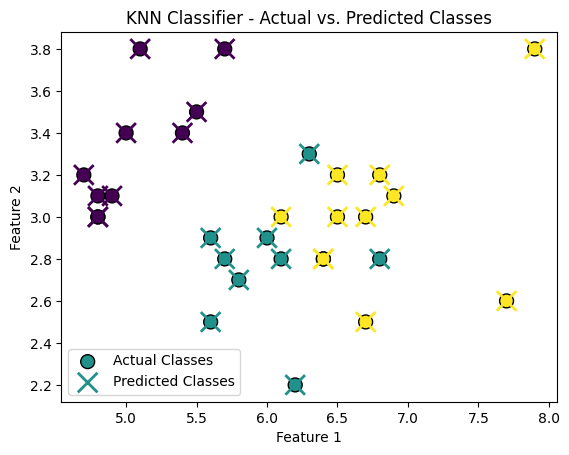

In [4]:
# Visualize the decision boundary for two features (assuming only two features for simplicity)
feature1 = 0  # Index of the first feature
feature2 = 1  # Index of the second feature

# Visualize the results with a scatter plot
plt.scatter(X_test[:, feature1], X_test[:, feature2], c=y_test, cmap='viridis', marker='o', edgecolor='k', s=100, label='Actual Classes')
plt.scatter(X_test[:, feature1], X_test[:, feature2], c=y_pred, cmap='viridis', marker='x', s=200, linewidth=2, label='Predicted Classes')

plt.xlabel(f'Feature {feature1 + 1}')
plt.ylabel(f'Feature {feature2 + 1}')
plt.title('KNN Classifier - Actual vs. Predicted Classes')
plt.legend()
plt.show()

- **Circles (o):** These represent the actual classes of the data points in the test set. Each circle corresponds to a data point, and its color indicates the true class of the data point.

- **Crosses (x):** These represent the predicted classes by the KNN classifier for the same set of data points. Each cross corresponds to a data point, and its color indicates the predicted class by the KNN algorithm.

The scatter plot allows a visual comparison between the predicted and actual classes, which shows how well the the KNN classifier performed. The crosses (predictions) and the circles (actual classes) align in the scatter plot above. If there was a misalignment, it indicates instances where the classifer made inncorrect predictions. All the predictions above aree correct as the all the colored crosses match the same coloured circles. 

### Support Vector Machines (SVM)
#### Overview
Support Vector Machine (SVM) is a powerful and versatile supervised machine learning algorithm used for both classification and regression tasks. The main idea behind SVMs is to find a hyperplane that maximally separates the different classes in the training data [7]. Each data item in the dataset is plotted in a N-dimensional space. N is the number of features in the data. SVM can only perform binary classification [7]. SVM can efficiently handle non-linear relationships by using kernel functions. Kernels transform the input features into higher-dimensional space, making it possible to find a hyperplane that can separate non-linearly separable data. The margin is the distance between the hyperplane and the nearest data point of any class. A disadvantage of SVM's is that as the size of the training set increases, the efficency decreases. 

#### Implementation

In [5]:
# Load the Iris dataset.
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42)

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [7]:
# Make predictions on the scaled test set
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97


The performance metrics of the Support Vector Machine (SVM) classifier on the given dataset demonstrate a high level of accuracy, precision, and recall, all equaling 0.97. This means the model correctly classified 97% of the instances in the test set. The recall gauges the ability of the model to capture all positive instances. These results indicate that the SVM classifier has effectively discriminated between different classes in the dataset.

In [8]:
# Display the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


The confusion matrix indicates the classifier performed exceptionally well. There are three disitnct classes, denoted as 0, 1, and 2. The diagonal elements (from top-left to bottom-right) represent the number of correctly classified instances for each class. In this case, class 0 has 10 correct predictions, class 1 has 8 correct predictions, and class 2 has 11 correct predictions. The matrix reveals a total of one misclassification, specifically where a data point from class 1 has been wrongly predicted as class 2. 

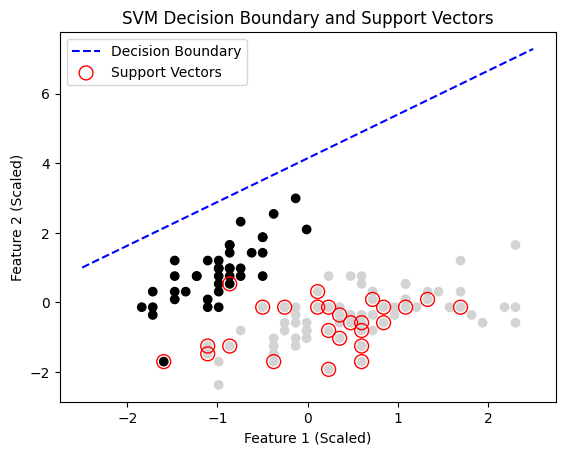

In [12]:
# https://www.geeksforgeeks.org/introduction-to-support-vector-machines-svm/
color = ['black' if c == 0 else 'lightgrey' for c in y_train]
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=color)

# Get the hyperplane parameters
w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy, label='Decision Boundary', color='blue', linestyle='--')

# Highlight the support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='r', label='Support Vectors')

plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('SVM Decision Boundary and Support Vectors')
plt.legend()
plt.show()

## References 
[1] *What is supervised learning?*, *IBM*, https://www.ibm.com/topics/supervised-learning#:~:text=Supervised%20learning%2C%20also%20known%20as%20supervised%20machine%20learning%2C,that%20to%20classify%20data%20or%20predict%20outcomes%20accurately.
<br>
[2] *Ronald Fisher*, *Wikipedia*, https://en.wikipedia.org/wiki/Ronald_Fisher
<br>
[3] *Multivariate statistics*, *Wikipedia*, https://en.wikipedia.org/wiki/Multivariate_statistics
<br>
[4] *5 Classification Algorithms for Machine Learning*, *Badreesh Shetty*, https://builtin.com/data-science/supervised-machine-learning-classification
<br>
[5] *Confusion Matrix in Machine Learning*, *GeeksforGeeks*, https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
<br>
[6] *What is the k-nearest neighbors algorithm?*, *IBM*, https://www.ibm.com/topics/knn
<br>
[7] *Introduction to Support Vector Machines (SVM)*, *GeeksforGeeks*, https://www.geeksforgeeks.org/introduction-to-support-vector-machines-svm/

***
# End